# Google Driveのマウントとワークディレクトリへの移動

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Master/research/model/
!ls

Mounted at /content/drive
/content/drive/MyDrive/Master/research/model
best_model.pth
I-ProtoMF_model.keras
item_proto_lfm2b-1mon_9e_38210573_21549076
item_proto_ml-1m_1e_38210573_38135658
item_proto_ml-1m_1e_38210573_9222eb22
item_proto_ml-1m_1e_38210573_96cf0f66
item_proto_ml-1m_1e_38210573_a26b9f1a
mf_lfm2b-1mon_08_38210573_aa2b91e4
mf_lfm2b-1mon_5a_38210573_1b4043be
mf_lfm2b-1mon_5a_38210573_270f5a7c
mf_lfm2b-1mon_5a_38210573_37455880
mf_lfm2b-1mon_5a_38210573_f5d01572
mf_lfm2b-1mon_c8_38210573_9ddefeba
MFmodel.h5
MFmodel.keras
mf_with_music_lfm2b-1mon_4e_38210573_78b6cd00
UI-ProtoMF_model.keras
U-ProtoMF_model.keras
user_item_proto_lfm2b-1mon_a1_38210573_c391a340
user_item_proto_ml-1m_34_38210573_3769f13c
user_item_proto_ml-1m_34_38210573_3dcadb68
user_item_proto_ml-1m_69_38210573_8e749356
user_item_proto_with_music_lfm2b-1mon_9c_38210573_add157c8
user_proto_lfm2b-1mon_4e_38210573_9dd4b97e
user_proto_lfm2b-1mon_4e_38210573_a5945a70
user_proto_lfm2b-1mon_f4_38210573_935ec310
user_p

In [ ]:
%cd /content/drive/MyDrive/Master/research/model/user_proto_ml-1m_5a_38210573_ac353a9e
!ls

/content/drive/MyDrive/Master/research/model/user_proto_ml-1m_5a_38210573_ac353a9e
best_model.pth


## パッケージの更新

In [ ]:
# scilit-learnをアップデート
!pip install -U scikit-learn

In [ ]:
import sklearn
print(sklearn.__version__)
# 1.5.2

1.5.2


# 学習済みモデルから各重みの取得

In [2]:
import os
import torch
import torch.nn as nn

# 学習済みモデルが保存されている親ディレクトリパス
base_model_dir = "/content/drive/MyDrive/Master/research/model/"

# 実行名のフォルダをリストアップ
experiment_folders = [f for f in os.listdir(base_model_dir) if os.path.isdir(os.path.join(base_model_dir, f))]

# 実行名のフォルダを表示
print("Available experiment folders:")
for idx, folder in enumerate(experiment_folders):
    print(f"{idx}: {folder}")

# ユーザーが実行名のフォルダを選択
selected_idx = int(input("💡Select the experiment folder index to load the model from: "))
selected_folder = experiment_folders[selected_idx]
selected_model_path = os.path.join(base_model_dir, selected_folder, "best_model.pth")

# 選択した重みをロード
print(f"Loading model weights from: {selected_model_path}")
state_dict = torch.load(selected_model_path, weights_only=True)

# state_dict の中身を確認
print("State dict keys:", state_dict.keys())

# state_dict の中身（例：重み）を確認
for key, value in state_dict.items():
    print(f"{key}: {value.shape if isinstance(value, torch.Tensor) else type(value)}")

Available experiment folders:
0: user_proto_ml-1m_5a_38210573_ac353a9e
1: user_proto_ml-1m_5a_38210573_a3c49bfc
2: user_proto_ml-1m_5a_38210573_b6ce9068
3: user_item_proto_ml-1m_34_38210573_3dcadb68
4: user_item_proto_ml-1m_34_38210573_3769f13c
5: item_proto_ml-1m_1e_38210573_9222eb22
6: item_proto_ml-1m_1e_38210573_96cf0f66
7: item_proto_ml-1m_1e_38210573_a26b9f1a
8: item_proto_ml-1m_1e_38210573_38135658
9: mf_lfm2b-1mon_08_38210573_aa2b91e4
10: mf_lfm2b-1mon_c8_38210573_9ddefeba
11: mf_lfm2b-1mon_5a_38210573_1b4043be
12: mf_lfm2b-1mon_5a_38210573_270f5a7c
13: mf_lfm2b-1mon_5a_38210573_37455880
14: mf_lfm2b-1mon_5a_38210573_f5d01572
15: user_item_proto_ml-1m_69_38210573_8e749356
16: user_proto_lfm2b-1mon_f4_38210573_935ec310
17: user_proto_lfm2b-1mon_f4_38210573_9afb4b02
18: item_proto_lfm2b-1mon_9e_38210573_21549076
19: mf_with_music_lfm2b-1mon_4e_38210573_78b6cd00
20: user_proto_lfm2b-1mon_4e_38210573_9dd4b97e
21: user_proto_lfm2b-1mon_4e_38210573_a5945a70
22: user_item_proto_lfm2b-

In [4]:
user_embeddings = state_dict['user_feature_extractor.embedding_ext.embedding_layer.weight'].cpu().detach().numpy()
item_embeddings = state_dict['item_feature_extractor.embedding_ext.embedding_layer.weight'].cpu().detach().numpy()
user_prototypes = state_dict['user_feature_extractor.prototypes'].cpu().detach().numpy()

In [8]:
item_embeddings = state_dict['item_feature_extractor.embedding_ext.embedding_layer.weight'].cpu().detach().numpy()
user_embeddings = state_dict['user_feature_extractor.embedding_layer.weight'].cpu().detach().numpy()
item_prototypes = state_dict['item_feature_extractor.prototypes'].cpu().detach().numpy()

U-ProtoMF

In [3]:
# ユーザー埋め込み
user_embeddings = state_dict['user_feature_extractor.embedding_ext.embedding_layer.weight'].cpu().detach().numpy()

# アイテム埋め込み
item_embeddings = state_dict['item_feature_extractor.embedding_layer.weight'].cpu().detach().numpy()

# ユーザーのプロトタイプ（プロトタイプ空間）
user_prototypes = state_dict['user_feature_extractor.prototypes'].cpu().detach().numpy()

KeyError: 'item_feature_extractor.embedding_layer.weight'

I-ProtoMF

In [5]:
# ユーザー埋め込み
user_embeddings = state_dict['user_feature_extractor.embedding_layer.weight'].cpu().detach().numpy()

# アイテム埋め込み
item_embeddings = state_dict['item_feature_extractor.embedding_layer.weight'].cpu().detach().numpy()

# アイテムのプロトタイプ（プロトタイプ空間）
item_prototypes = state_dict['item_feature_extractor.prototypes'].cpu().detach().numpy()

KeyError: 'item_feature_extractor.embedding_layer.weight'

UI-ProtoMF

In [3]:
# ユーザー埋め込み
user_embeddings = state_dict['user_feature_extractor.model_1.embedding_ext.embedding_layer.weight'].cpu().detach().numpy()

# アイテム埋め込み
item_embeddings = state_dict['item_feature_extractor.model_1.embedding_ext.embedding_layer.weight'].cpu().detach().numpy()

# ユーザーとアイテムのプロトタイプ（プロトタイプ空間）
user_prototypes = state_dict['user_feature_extractor.model_1.prototypes'].cpu().detach().numpy()
item_prototypes = state_dict['item_feature_extractor.model_1.prototypes'].cpu().detach().numpy()

# T-SNEでの可視化

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

def tsne_plot(objects: np.ndarray, prototypes: np.ndarray, object_legend_text: str = 'Object', perplexity: int = 5,
              path_save_fig: str = None):
    """
    Creates a TSNE plot to visualize the object embeddings and the prototypes in the same space.
    """
    tsne = TSNE(perplexity=perplexity, metric='cosine', init='pca', learning_rate='auto', random_state=42)

    tsne_results = tsne.fit_transform(np.vstack([prototypes, objects]))
    tsne_protos = tsne_results[:len(prototypes)]
    tsne_embeds = tsne_results[len(prototypes):]

    plt.figure(figsize=(6, 6), dpi=100)
    plt.scatter(tsne_embeds[:, 0], tsne_embeds[:, 1], s=10, alpha=0.6, c='#74add1', label=object_legend_text)
    plt.scatter(tsne_protos[:, 0], tsne_protos[:, 1], s=30, c='#d73027', alpha=0.9, label='Prototypes')

    plt.axis('off')
    plt.tight_layout()
    plt.legend(loc="upper left", prop={'size': 13})
    if path_save_fig:
        plt.savefig(path_save_fig, format='pdf')
    plt.show()


/content/drive/MyDrive/Master/research/results


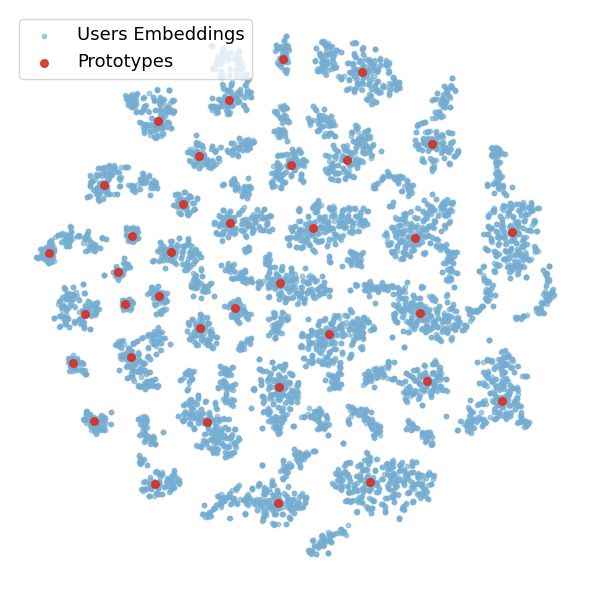

In [6]:
%cd /content/drive/MyDrive/Master/research/results/
tsne_plot(objects=user_embeddings, prototypes=user_prototypes, object_legend_text='Users Embeddings', perplexity=5, path_save_fig='tsne_users_and_prototypes.pdf')

/content/drive/MyDrive/Master/research/results


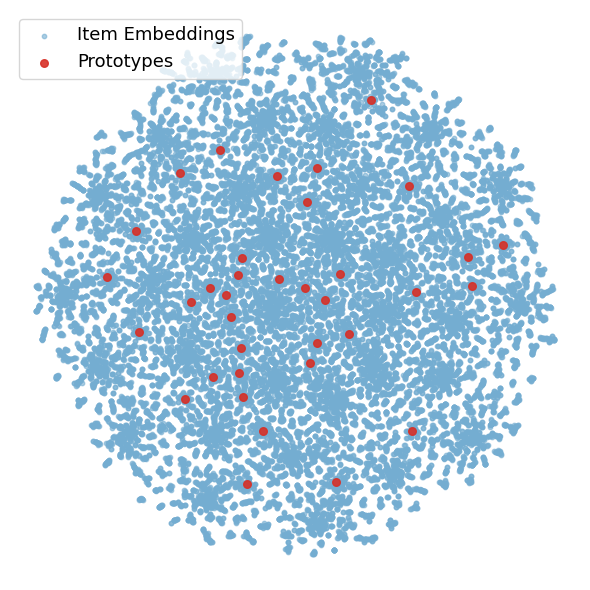

In [9]:
%cd /content/drive/MyDrive/Master/research/results/
tsne_plot(objects=item_embeddings, prototypes=item_prototypes, object_legend_text='Item Embeddings', perplexity=5, path_save_fig='tsne_item_and_prototypes.pdf')


/content/drive/MyDrive/Master/research/results


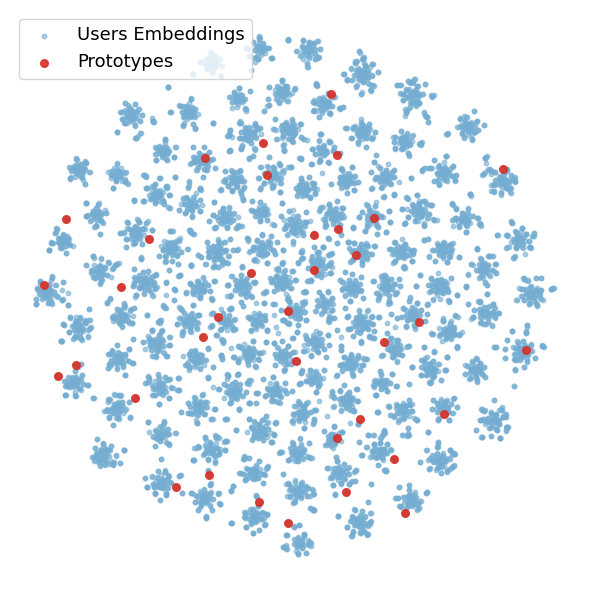

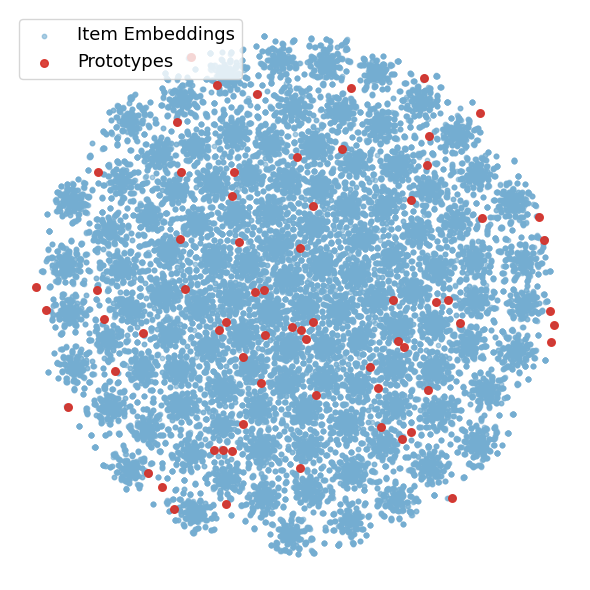

In [5]:
# T-SNE プロットの実行
# 結果保存ディレクトリへ移動
%cd /content/drive/MyDrive/Master/research/results/
tsne_plot(objects=user_embeddings, prototypes=user_prototypes, object_legend_text='Users Embeddings', perplexity=5, path_save_fig='tsne_users_and_prototypes.pdf')

tsne_plot(objects=item_embeddings, prototypes=item_prototypes, object_legend_text='Item Embeddings', perplexity=5, path_save_fig='tsne_item_and_prototypes.pdf')

# 上位アイテムの取得

In [6]:
def get_top_k_items(item_weights: np.ndarray, items_info: pd.DataFrame, proto_idx: int,
                    top_k: int = 5, invert: bool = False):
    """
    特定のプロトタイプに最も近い（または遠い）Top-Kアイテムを取得する。

    :param item_weights: Vector having, for each item, a value for each prototype. Shape is (n_items, n_prototypes)
    :param items_info: アイテム情報のデータフレーム (item_idがカラムとして含まれること)
    :param proto_idx: プロトタイプのインデックス
    :param top_k: 上位K件を取得
    :param invert: Trueにすると遠いアイテムを取得, Falseで近いアイテムを取得
    :return: Top-Kアイテム情報のDataFrame
    """
    assert proto_idx < item_weights.shape[1], \
        f'proto_idx {proto_idx} is too high compared to the number of available prototypes.'

    # プロトタイプに対するアイテムのスコアを取得
    weights_proto = item_weights[:, proto_idx]

    # スコア順にソート
    top_k_indexes = np.argsort(weights_proto if invert else -weights_proto)[:top_k]
    top_k_weights = weights_proto[top_k_indexes]

    # items_infoの行インデックスを使用してデータを取得
    item_infos_top_k = items_info.iloc[top_k_indexes].copy()
    item_infos_top_k['item weight'] = top_k_weights

    return item_infos_top_k

In [7]:
def get_top_k_prototypes_for_item(item_weights: np.ndarray, item_idx: int, top_k: int = 3):
    """
    任意のアイテムに対するスコアが高い上位K個のプロトタイプインデックスを取得します。

    :param item_weights: Vector having, for each item, a value for each prototype. Shape is (n_items, n_prototypes)
    :param item_idx: 任意のアイテムのインデックス
    :param top_k: 上位K個のプロトタイプを取得
    :return: 上位K個のプロトタイプインデックスのリスト
    """
    assert item_idx < item_weights.shape[0], "指定したアイテムインデックスが存在しません。"

    # 任意のアイテムに対するプロトタイプスコアを取得
    scores_for_item = item_weights[item_idx]

    # スコアの高い順にソートして上位Kインデックスを取得
    top_k_protos = np.argsort(-scores_for_item)[:top_k]  # 降順ソート

    return top_k_protos

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# movies.datを読み込んでitems_infoデータフレームを作成
file_path = '/content/drive/MyDrive/Master/research/data/ml-1m/movies.dat'
items_info = pd.read_csv(file_path, sep='::', engine='python', names=['item_id', 'title', 'genres'], encoding='ISO-8859-1')

# 例: item_weightsの準備
item_weights = cosine_similarity(item_embeddings, item_prototypes)  # (n_items, n_prototypes)

# 任意のアイテムインデックスを指定
item_idx = 0  # 例として0番目のアイテム

# 上位3つのプロトタイプインデックスを取得
top_k_prototypes = get_top_k_prototypes_for_item(item_weights, item_idx, top_k=3)

# アイテム情報の取得 (items_infoはitem_idをインデックスにしていることを仮定)
item_info = items_info.iloc[item_idx]  # item_idxに該当するアイテム情報

# 表示
print(f"Item {item_idx} に対する情報:")
print(item_info)

print(f"\nItem {item_idx} に対してスコアが高いプロトタイプインデックス: {top_k_prototypes}")

# 各プロトタイプに対して最も近いアイテムを取得
for proto_idx in top_k_prototypes:
    print(f"\nプロトタイプ {proto_idx} に対するTop-5のアイテム推薦:")
    top_k_items = get_top_k_items(item_weights=item_weights, items_info=items_info, proto_idx=proto_idx, top_k=5)
    print(top_k_items)

NameError: name 'get_top_k_prototypes_for_item' is not defined

# 重み可視化

値を返すver.

In [8]:
def weight_visualization(u_sim_mtx: np.ndarray, u_proj: np.ndarray, i_sim_mtx: np.ndarray, i_proj: np.ndarray,
                         annotate_top_k: int = 3):
    """
    Creates weight visualization plots which explain the recommendation of ProtoMF.
    Returns the indices of the top-k contributing prototypes.
    """
    rescale = lambda y: 1 - ((y + np.max(y)) / (np.max(y) * 2))

    # Computing the logits
    u_prods = u_sim_mtx * i_proj
    i_prods = i_sim_mtx * u_proj

    # 上位K個の寄与度が高いインデックスを取得
    u_annotate_protos = np.argsort(-u_prods)[:annotate_top_k]
    i_annotate_protos = np.argsort(-i_prods)[:annotate_top_k]

    # ユーザープロット
    u_fig, u_axes = plt.subplots(3, 1, sharey='row', dpi=100, figsize=(8, 8))
    u_x = np.arange(u_sim_mtx.shape[-1])

    bars_u_prods = u_axes[0].bar(u_x, u_prods, color=plt.get_cmap('coolwarm')(rescale(u_prods)))
    bars_i_proj = u_axes[1].bar(u_x, i_proj, color=plt.get_cmap('coolwarm')(rescale(i_proj)))
    bars_u_sim_mtx = u_axes[2].bar(u_x, u_sim_mtx, color=plt.get_cmap('coolwarm')(rescale(u_sim_mtx)))

    # ユーザー側の注釈（上位Kバーに寄与値とインデックス表示）
    for idx, bars in enumerate([bars_u_prods, bars_i_proj, bars_u_sim_mtx]):
        for u_annotate_idx in u_annotate_protos:
            bar = bars[u_annotate_idx]
            height = bar.get_height()
            u_axes[idx].annotate(f'{u_annotate_idx}',
                                 (bar.get_x() + bar.get_width() / 2, height),
                                 ha='center', va='bottom', fontsize=10, color='black')

    u_axes[0].set_xlabel(r'$ {\mathbf{s}}^{\mathrm{user}}$', fontsize=24)
    u_axes[1].set_xlabel('$ \hat{\mathbf{t}} $', fontsize=24)
    u_axes[2].set_xlabel('$ \mathbf{u}^{*} $', fontsize=24)
    plt.tight_layout()
    plt.show()

    # アイテムプロット
    i_fig, i_axes = plt.subplots(3, 1, sharey='row', dpi=100, figsize=(8, 8))
    i_x = np.arange(i_sim_mtx.shape[-1])

    bars_i_prods = i_axes[0].bar(i_x, i_prods, color=plt.get_cmap('coolwarm')(rescale(i_prods)))
    bars_u_proj = i_axes[1].bar(i_x, u_proj, color=plt.get_cmap('coolwarm')(rescale(u_proj)))
    bars_i_sim_mtx = i_axes[2].bar(i_x, i_sim_mtx, color=plt.get_cmap('coolwarm')(rescale(i_sim_mtx)))

    # アイテム側の注釈（上位Kバーに寄与値とインデックス表示）
    for idx, bars in enumerate([bars_i_prods, bars_u_proj, bars_i_sim_mtx]):
        for i_annotate_idx in i_annotate_protos:
            bar = bars[i_annotate_idx]
            height = bar.get_height()
            i_axes[idx].annotate(f'{i_annotate_idx}',
                                 (bar.get_x() + bar.get_width() / 2, height),
                                 ha='center', va='bottom', fontsize=10, color='black')

    i_axes[0].set_xlabel('$ \mathbf{s}^{\mathrm{item}} $', fontsize=24)
    i_axes[1].set_xlabel('$ \hat{\mathbf{u}} $', fontsize=24)
    i_axes[2].set_xlabel('$ \mathbf{t}^{*} $', fontsize=24)
    plt.tight_layout()
    plt.show()

    # 上位Kのインデックスを返す
    return u_annotate_protos, i_annotate_protos

In [9]:
user_embeddings = state_dict['user_feature_extractor.model_2.linear_layer.weight'].cpu().detach().numpy()
item_embeddings = state_dict['item_feature_extractor.model_2.linear_layer.weight'].cpu().detach().numpy()
print("user_embeddings shape:", user_embeddings.shape)
print("item_embeddings shape:", item_embeddings.shape)

user_embeddings shape: (68, 55)
item_embeddings shape: (36, 55)


In [10]:
u_proj = state_dict['user_feature_extractor.model_1.prototypes'].cpu().detach().numpy()
i_proj = state_dict['item_feature_extractor.model_1.prototypes'].cpu().detach().numpy()
print("u_proj shape:", u_proj.shape)
print("i_proj shape:", i_proj.shape)

u_proj shape: (36, 55)
i_proj shape: (68, 55)


In [11]:
user_id = 0  # 例としてユーザーID 0
item_id = 0  # 例としてアイテムID 0

user_vector = user_embeddings[user_id]
item_vector = item_embeddings[item_id]

In [12]:
import numpy as np
import torch

def adjust_sim_mtx_dims(u_sim_mtx, i_sim_mtx, n_item_prototypes, n_user_prototypes):
    # 型を確認 (numpy.ndarray として受け取った場合は torch.Tensor に変換)
    if isinstance(u_sim_mtx, np.ndarray):
        u_sim_mtx = torch.tensor(u_sim_mtx)
    if isinstance(i_sim_mtx, np.ndarray):
        i_sim_mtx = torch.tensor(i_sim_mtx)


    if u_sim_mtx.size(1) != n_item_prototypes:
        # u_sim_mtx をプロトタイプ数に合わせて調整
        repeat_factor = (n_item_prototypes + u_sim_mtx.size(1) - 1) // u_sim_mtx.size(1)
        u_sim_mtx = u_sim_mtx.repeat(1, repeat_factor)[:, :n_item_prototypes]


    if i_sim_mtx.size(1) != n_user_prototypes:
        # i_sim_mtx をプロトタイプ数に合わせて調整
        repeat_factor = (n_user_prototypes + i_sim_mtx.size(1) - 1) // i_sim_mtx.size(1)
        i_sim_mtx = i_sim_mtx.repeat(1, repeat_factor)[:, :n_user_prototypes]

    return u_sim_mtx, i_sim_mtx

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

u_sim_mtx = cosine_similarity(user_vector.reshape(1, -1), u_proj)
i_sim_mtx = cosine_similarity(item_vector.reshape(1, -1), i_proj)
print("u_sim_mtx shape:",u_sim_mtx.shape)
print("i_sim_mtx shape:",i_sim_mtx.shape)

n_user_prototypes = u_sim_mtx.shape[1]  # u_sim_mtx のプロトタイプ数
n_item_prototypes = i_sim_mtx.shape[1]
print(f"ユーザーのプロトタイプ数: {n_user_prototypes}")
print(f"アイテムのプロトタイプ数: {n_item_prototypes}")

# 次元調整
# u_sim_mtx, i_sim_mtx = adjust_sim_mtx_dims(u_sim_mtx, i_sim_mtx, n_item_prototypes, n_user_prototypes)

# u_sim_mtx=u_sim_mtx.flatten()
# i_sim_mtx=i_sim_mtx.flatten()
# u_sim_mtx = u_sim_mtx.unsqueeze(1).numpy() # (68,) -> (68, 1)
# i_sim_mtx = i_sim_mtx.unsqueeze(1).numpy() # (68,) -> (68, 1)

# u_sim_mtx=u_sim_mtx.flatten().numpy()
# i_sim_mtx=i_sim_mtx.flatten().numpy()

u_sim_mtx=u_sim_mtx.flatten()
i_sim_mtx=i_sim_mtx.flatten()

print("u_sim_mtx shape:",u_sim_mtx.shape)
print("i_sim_mtx shape:",i_sim_mtx.shape)

u_sim_mtx shape: (1, 36)
i_sim_mtx shape: (1, 68)
ユーザーのプロトタイプ数: 36
アイテムのプロトタイプ数: 68
u_sim_mtx shape: (36,)
i_sim_mtx shape: (68,)


In [14]:
import numpy as np
import torch

def adjust_proj_dims(u_proj, i_proj, n_item_prototypes, n_user_prototypes):
    # 型を確認 (numpy.ndarray として受け取った場合は torch.Tensor に変換)
    if isinstance(u_proj, np.ndarray):
        u_proj = torch.tensor(u_proj)
    if isinstance(i_proj, np.ndarray):
        i_proj = torch.tensor(i_proj)


    if u_proj.size(1) != n_item_prototypes:
        # u_sim_mtx をプロトタイプ数に合わせて調整
        repeat_factor = (n_item_prototypes + u_proj.size(1) - 1) // u_proj.size(1)
        u_proj = u_proj.repeat(1, repeat_factor)[:, :n_item_prototypes]


    if i_proj.size(1) != n_user_prototypes:
        # i_sim_mtx をプロトタイプ数に合わせて調整
        repeat_factor = (n_user_prototypes + i_proj.size(1) - 1) // i_proj.size(1)
        i_proj = i_proj.repeat(1, repeat_factor)[:, :n_user_prototypes]

    return u_proj, i_proj

In [15]:
n_user_prototypes = u_sim_mtx.shape[0]  # u_sim_mtx のプロトタイプ数
n_item_prototypes = i_sim_mtx.shape[0]
print(f"ユーザーのプロトタイプ数: {n_user_prototypes}")
print(f"アイテムのプロトタイプ数: {n_item_prototypes}")


u_proj, i_proj = adjust_proj_dims(u_proj, i_proj, n_item_prototypes, n_user_prototypes)

# u_projの変換: 平均を取って [95,] にする
u_proj = u_proj.mean(dim=0).numpy()  # shape: [95,]

# i_projの変換: 平均を取って [17,] にする
i_proj = i_proj.mean(dim=0).numpy()  # shape: [17,]

print("u_proj shape:", u_proj.shape)
print("i_proj shape:", i_proj.shape)

ユーザーのプロトタイプ数: 36
アイテムのプロトタイプ数: 68
u_proj shape: (68,)
i_proj shape: (36,)


In [16]:
# u_proj=u_proj.mean(axis=1)
# i_proj=i_proj.mean(axis=1)
# print("u_proj shape:",u_proj.shape)
# print("i_proj shape:",i_proj.shape)

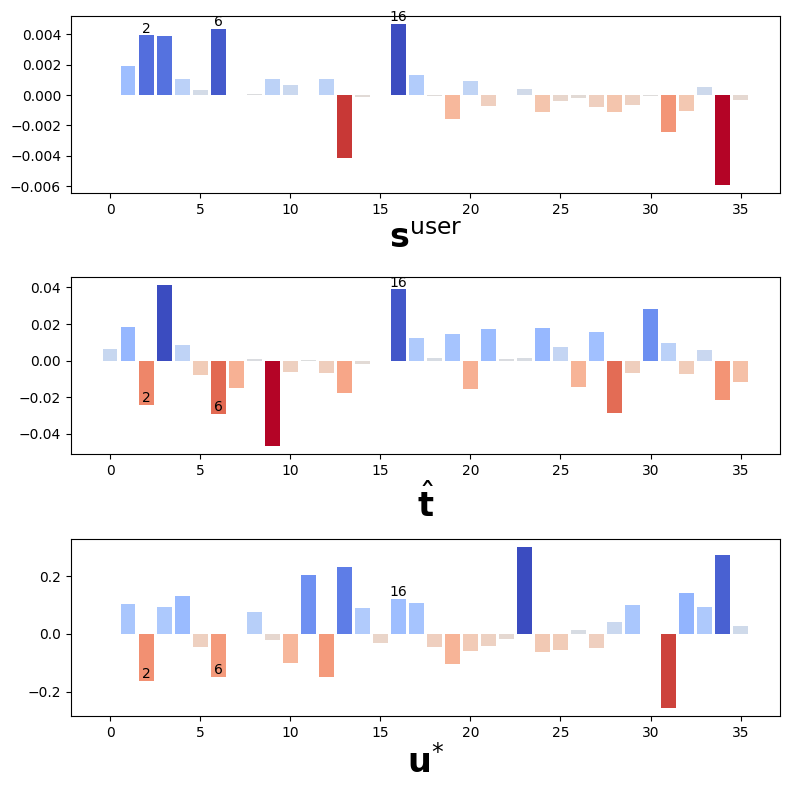

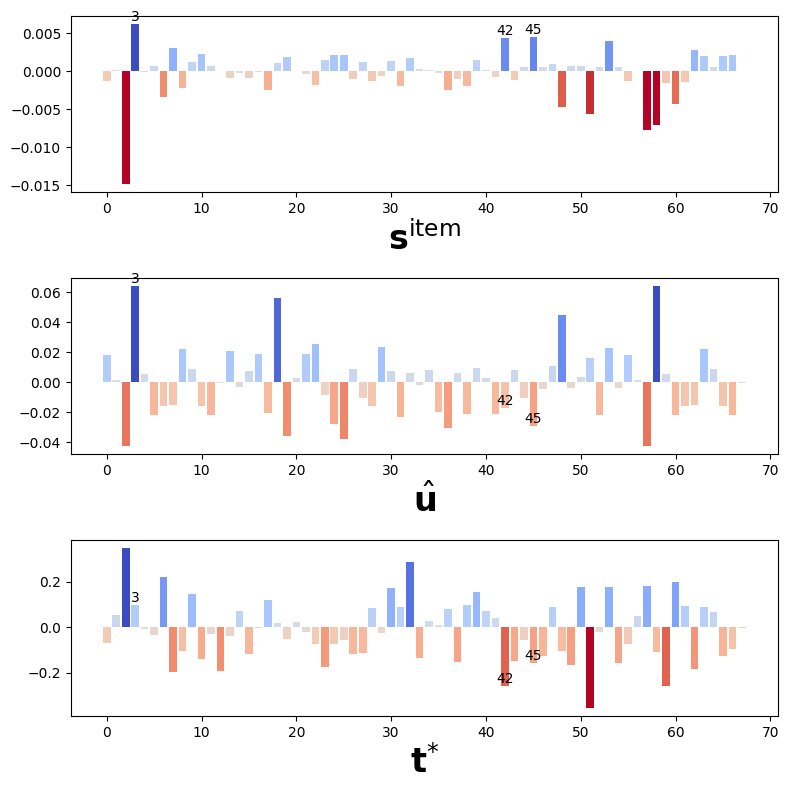

Top contributing user prototype indices: [16  6  2]
Top contributing item prototype indices: [ 3 45 42]


In [17]:
u_top_indices, i_top_indices = weight_visualization(
    u_sim_mtx=u_sim_mtx,
    u_proj=u_proj,
    i_sim_mtx=i_sim_mtx,
    i_proj=i_proj,
    annotate_top_k=3
)

print("Top contributing user prototype indices:", u_top_indices)
print("Top contributing item prototype indices:", i_top_indices)

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


# データセットを選択
dataset_type = input("データセットを選択してください (ml,lfm): ").strip().lower()

# 選択したデータセットに応じたCSVファイルのパスを設定
if dataset_type == 'ml':
    item_file_path = '/content/drive/MyDrive/Master/research/data/ml-1m/movies.dat'
    items_info = pd.read_csv(item_file_path, sep='::', engine='python', names=['item_id', 'title', 'genres'], encoding='ISO-8859-1')

    user_file_path = '/content/drive/MyDrive/Master/research/data/ml-1m/users.dat'
    users_info = pd.read_csv(user_file_path, sep='::', engine='python',
                            names=['user_id', 'gender', 'age', 'occupation', 'zip_code'], encoding='ISO-8859-1')
elif dataset_type == 'lfm':
    items_info = pd.read_csv('/content/drive/MyDrive/Master/research/data/lastfm/tracks.tsv', delimiter='\t')
    users_info = pd.read_csv('/content/drive/MyDrive/Master/research/data/lastfm/users.tsv', delimiter='\t')

else:
    print("無効な入力です。ml,lfm のいずれかを入力してください。")
    exit(1)


# 表を表示
print(f"User {user_id} に対するItem {item_id} の推薦スコアに関するプロトタイプ:")

# アイテム情報の取得
user_info = users_info.iloc[user_id]  # user_idに該当するアイテム情報

print(f"User {user_id} に対する情報:")
print(user_info)

# アイテム情報の取得
item_info = items_info.iloc[item_id]  # item_idに該当するアイテム情報

print(f"Item {item_id} に対する情報:")
print(item_info)

# 例: item_weightsの準備
item_weights = cosine_similarity(item_embeddings, item_prototypes)  # (n_items, n_prototypes)

u_proto_idxs=u_top_indices
print(u_proto_idxs)


# 各プロトタイプインデックスに対して、トップKアイテムを取得
top_k_results = []
top_k = 5  # 取得するアイテム数

for proto_idx in u_proto_idxs:
    top_k_items = get_top_k_items(item_weights=item_weights, items_info=items_info, proto_idx=proto_idx, top_k=top_k, invert=False)
    top_k_items['prototype_index'] = proto_idx  # プロトタイプインデックスを追加
    top_k_results.append(top_k_items)

# 結果を表示
# リストをDataFrameに変換
top_k_df = pd.concat(top_k_results)

# プロトタイプごとの列を作成（optional）
top_k_df = top_k_df.reset_index()



# 表を表示
import IPython.display as display
display.display(top_k_df)

i_proto_idxs=i_top_indices
print(i_proto_idxs)

# 各プロトタイプインデックスに対して、トップKアイテムを取得
top_k_results = []
top_k = 5  # 取得するアイテム数

for proto_idx in i_proto_idxs:
    top_k_items = get_top_k_items(item_weights=item_weights, items_info=items_info, proto_idx=proto_idx, top_k=top_k, invert=False)
    top_k_items['prototype_index'] = proto_idx  # プロトタイプインデックスを追加
    top_k_results.append(top_k_items)

# 結果を表示
# リストをDataFrameに変換
top_k_df = pd.concat(top_k_results)

# プロトタイプごとの列を作成（optional）
top_k_df = top_k_df.reset_index()


# 表を表示
import IPython.display as display
display.display(top_k_df)

データセットを選択してください (ml,lfm): lfm
User 0 に対するItem 0 の推薦スコアに関するプロトタイプ:
User 0 に対する情報:
user_id                            2
country                           UK
age                               35
gender                             m
creation_time    2002-10-29 01:00:00
Name: 0, dtype: object
Item 0 に対する情報:
track_id             138
artist      Böhse Onkelz
track                  !
Name: 0, dtype: object
[16  6  2]


,index,track_id,artist,track,item weight,prototype_index
0,9,217,Samey,!,0.351033,16
1,30,773,Alicks,!!!!,0.249877,16
2,25,625,ʕ•̫͡•ʕ•̫͡•ʔ•̫͡•ʔ•̫͡•ʕ•̫͡•ʔ•̫͡•ʕ•̫͡•ʕ•̫͡•ʔ•̫͡•ʔ...,!! ʕ•̫͡•ʔ•̫͡•ʕ•̫͡•ʔ3,0.217872,16
3,29,744,DENIS MPUNGA & PAUL K.,!!! KWE,0.195837,16
4,10,227,To Heaven Earth Is Hell,!,0.180475,16
5,0,138,Böhse Onkelz,!,0.222493,6
6,32,782,Western Sky,!!!!,0.213359,6
7,24,586,Kylie Minoise,!!,0.190564,6
8,29,744,DENIS MPUNGA & PAUL K.,!!! KWE,0.178065,6
9,12,257,С.к.а.й.,!,0.167877,6


[ 3 45 42]


,index,track_id,artist,track,item weight,prototype_index
0,22,469,Lustre King,! Pistola !,0.218018,3
1,2,159,Hellyeah,!,0.193777,3
2,25,625,ʕ•̫͡•ʕ•̫͡•ʔ•̫͡•ʔ•̫͡•ʕ•̫͡•ʔ•̫͡•ʕ•̫͡•ʕ•̫͡•ʔ•̫͡•ʔ...,!! ʕ•̫͡•ʔ•̫͡•ʕ•̫͡•ʔ3,0.162590,3
3,34,797,Peter Evans,!!!!!,0.149790,3
4,13,291,Cardian松の木,! ! PARENTAL PERMISSION ! !,0.149593,3
5,32,782,Western Sky,!!!!,0.362330,45
6,6,197,Onyx,!,0.277716,45
7,3,174,Kylie Minoise,!,0.263004,45
8,22,469,Lustre King,! Pistola !,0.221111,45
9,8,203,Pato Fu,!,0.207006,45


# don't use

In [ ]:
import os
import torch
import torch.nn as nn

# 学習済みモデルが保存されている親ディレクトリパス
base_model_dir = "/content/drive/MyDrive/Master/research/model/"

# 実行名のフォルダをリストアップ
experiment_folders = [f for f in os.listdir(base_model_dir) if os.path.isdir(os.path.join(base_model_dir, f))]

# 実行名のフォルダを表示
print("Available experiment folders:")
for idx, folder in enumerate(experiment_folders):
    print(f"{idx}: {folder}")

# ユーザーが実行名のフォルダを選択
selected_idx = int(input("💡Select the experiment folder index to load the model from: "))
selected_folder = experiment_folders[selected_idx]
selected_model_path = os.path.join(base_model_dir, selected_folder, "best_model.pth")

# 選択した重みをロード
print(f"Loading model weights from: {selected_model_path}")
state_dict = torch.load(selected_model_path, weights_only=True)

# state_dict の中身を確認
print("State dict keys:", state_dict.keys())

# state_dict の中身（例：重み）を確認
for key, value in state_dict.items():
    print(f"{key}: {value.shape if isinstance(value, torch.Tensor) else type(value)}")

# 部分一致を使ってユーザー、アイテム、プロトタイプの埋め込みを抽出する関数
def extract_embeddings(state_dict, keywords_user=["user_feature_extractor"], keywords_item=["item_feature_extractor"], keywords_user_prototypes=["user_feature_extractor", "prototypes"], keywords_item_prototypes=["item_feature_extractor", "prototypes"]):
    # ユーザー、アイテム、ユーザーのプロトタイプ、アイテムのプロトタイプの埋め込みを格納するリスト
    user_embeddings = []
    item_embeddings = []
    user_prototypes = []
    item_prototypes = []

    # state_dictからキーを検索
    for key in state_dict.keys():
        # ユーザー関連のキーワードをすべて含むキー
        if all(keyword in key for keyword in keywords_user):
            user_embeddings.append(state_dict[key].cpu().detach().numpy())

        # アイテム関連のキーワードをすべて含むキー
        if all(keyword in key for keyword in keywords_item):
            item_embeddings.append(state_dict[key].cpu().detach().numpy())

        # ユーザーのプロトタイプ関連のキーワードをすべて含むキー
        if all(keyword in key for keyword in keywords_user_prototypes):
            user_prototypes.append(state_dict[key].cpu().detach().numpy())

        # アイテムのプロトタイプ関連のキーワードをすべて含むキー
        if all(keyword in key for keyword in keywords_item_prototypes):
            item_prototypes.append(state_dict[key].cpu().detach().numpy())

    # ユーザー、アイテム、プロトタイプの埋め込みを返す
    return user_embeddings, item_embeddings, user_prototypes, item_prototypes

# 例えば、"user_feature_extractor" と "embedding_ext.embedding_layer.weight" を含む重みを抽出する場合
keywords_user = ["user_feature_extractor", "embedding_ext.embedding_layer.weight"]
keywords_item = ["item_feature_extractor", "embedding_ext.embedding_layer.weight"]

# プロトタイプに関連する重みの検索キーワード
keywords_user_prototypes = ["user_feature_extractor", "prototypes"]
keywords_item_prototypes = ["item_feature_extractor", "prototypes"]

# ユーザーとアイテムの埋め込み、プロトタイプを抽出
print("埋め込みとプロトタイプを抽出します：")
user_embeddings, item_embeddings, user_prototypes, item_prototypes = extract_embeddings(
    state_dict, keywords_user, keywords_item, keywords_user_prototypes, keywords_item_prototypes)

# 抽出した結果を表示
if user_embeddings:
    print(f"User embeddings extracted successfully. Number of embeddings: {len(user_embeddings)}")
else:
    print(f"No user embeddings found.")

if item_embeddings:
    print(f"Item embeddings extracted successfully. Number of embeddings: {len(item_embeddings)}")
else:
    print(f"No item embeddings found.")

if user_prototypes:
    print(f"User prototypes extracted successfully. Number of prototypes: {len(user_prototypes)}")
else:
    print(f"No user prototypes found.")

if item_prototypes:
    print(f"Item prototypes extracted successfully. Number of prototypes: {len(item_prototypes)}")
else:
    print(f"No item prototypes found.")


Available experiment folders:
0: user_proto_ml-1m_5a_38210573_ac353a9e
1: user_proto_ml-1m_5a_38210573_a3c49bfc
2: user_proto_ml-1m_5a_38210573_b6ce9068
3: user_item_proto_ml-1m_34_38210573_3dcadb68
4: user_item_proto_ml-1m_34_38210573_3769f13c
5: item_proto_ml-1m_1e_38210573_9222eb22
6: item_proto_ml-1m_1e_38210573_96cf0f66
7: item_proto_ml-1m_1e_38210573_a26b9f1a
8: item_proto_ml-1m_1e_38210573_38135658
9: mf_lfm2b-1mon_08_38210573_aa2b91e4
10: mf_lfm2b-1mon_c8_38210573_9ddefeba
11: mf_lfm2b-1mon_5a_38210573_1b4043be
12: mf_lfm2b-1mon_5a_38210573_270f5a7c
13: mf_lfm2b-1mon_5a_38210573_37455880
14: mf_lfm2b-1mon_5a_38210573_f5d01572
15: user_item_proto_ml-1m_69_38210573_8e749356
💡Select the experiment folder index to load the model from: 4
Loading model weights from: /content/drive/MyDrive/Master/research/model/user_item_proto_ml-1m_34_38210573_3769f13c/best_model.pth
State dict keys: odict_keys(['user_feature_extractor.model_1.prototypes', 'user_feature_extractor.model_1.embedding_ex

In [ ]:
%cd /content/drive/MyDrive/Master/research/model/item_proto_ml-1m_1e_38210573_96cf0f66/

/content/drive/MyDrive/Master/research/model/item_proto_ml-1m_1e_38210573_96cf0f66


In [ ]:
import torch

# モデルの重みをロード
model_path = 'best_model.pth'
state_dict = torch.load(model_path, weights_only=True)

# state_dict の中身を確認
print("State dict keys:", state_dict.keys())

# state_dict の中身（例：重み）を確認
for key, value in state_dict.items():
    print(f"{key}: {value.shape if isinstance(value, torch.Tensor) else type(value)}")

State dict keys: odict_keys(['user_feature_extractor.embedding_layer.weight', 'item_feature_extractor.prototypes', 'item_feature_extractor.embedding_ext.embedding_layer.weight'])
user_feature_extractor.embedding_layer.weight: torch.Size([6034, 36])
item_feature_extractor.prototypes: torch.Size([36, 17])
item_feature_extractor.embedding_ext.embedding_layer.weight: torch.Size([3125, 17])


In [ ]:
item_embeddings = state_dict['item_feature_extractor.embedding_ext.embedding_layer.weight'].cpu().detach().numpy()
item_prototypes = state_dict['item_feature_extractor.prototypes'].cpu().detach().numpy()

In [ ]:
import pandas as pd

# movies.datを読み込んでitems_infoデータフレームを作成
file_path = '/content/drive/MyDrive/Master/research/data/ml-1m/movies.dat'
items_info = pd.read_csv(file_path, sep='::', engine='python', names=['item_id', 'title', 'genres'], encoding='ISO-8859-1')

# ランダムに3つのプロトタイプインデックスを選択(例: 0番目のプロトタイプに対するアイテムの推奨)
random_proto_idxs = np.random.choice(user_prototypes.shape[1], 3, replace=False)


# 各プロトタイプインデックスに対して、トップKアイテムを取得
top_k_results = []
top_k = 5  # 取得するアイテム数

for proto_idx in random_proto_idxs:
    top_k_items = get_top_k_items(item_weights=item_embeddings, items_info=items_info, proto_idx=proto_idx, top_k=top_k, invert=False)
    top_k_items['prototype_index'] = proto_idx  # プロトタイプインデックスを追加
    top_k_results.append(top_k_items)

# 結果を表示
# リストをDataFrameに変換
top_k_df = pd.concat(top_k_results)

# プロトタイプごとの列を作成（optional）
top_k_df = top_k_df.reset_index()

# 表を表示
import IPython.display as display
display.display(top_k_df)

,item_id,title,genres,item weight,prototype_index
0,246,Hoop Dreams (1994),Documentary,0.324843,12
1,282,Nell (1994),Drama,0.228720,12
2,53,Lamerica (1994),Drama,0.204757,12
3,586,Home Alone (1990),Children's|Comedy,0.161545,12
4,163,Desperado (1995),Action|Romance|Thriller,0.148537,12
5,480,Jurassic Park (1993),Action|Adventure|Sci-Fi,0.270221,5
6,570,"Slingshot, The (Kådisbellan ) (1993)",Comedy|Drama,0.223089,5
7,1224,Henry V (1989),Drama|War,0.208852,5
8,504,No Escape (1994),Action|Sci-Fi,0.197593,5
9,84,Last Summer in the Hamptons (1995),Comedy|Drama,0.195908,5


In [ ]:
# i_sim_mtxとu_sim_mtxの準備
i_sim_mtx = cosine_similarity(item_embeddings, item_prototypes)  # (n_items, n_prototypes)
u_sim_mtx = cosine_similarity(user_embeddings, user_prototypes)  # (n_items, n_prototypes)
print("i_sim_mtx shape:",i_sim_mtx.shape)
print("u_sim_mtx shape:",u_sim_mtx.shape)

i_sim_mtx shape: (3125, 95)
u_sim_mtx shape: (6034, 17)


In [ ]:
u_proj = user_embeddings @ user_prototypes.T
i_proj = item_embeddings @ item_prototypes.T
print("u_proj shape:", u_proj.shape)
print("i_proj shape:", i_proj.shape)

u_proj shape: (6034, 17)
i_proj shape: (3125, 95)


In [ ]:
n_user_prototypes = u_sim_mtx.shape[1]  # u_sim_mtx のプロトタイプ数
n_item_prototypes = i_sim_mtx.shape[1]  # i_sim_mtx のプロトタイプ数
n_users=u_sim_mtx.shape[0]
n_items=i_sim_mtx.shape[0]
print(f"ユーザーのプロトタイプ数: {n_user_prototypes}")
print(f"アイテムのプロトタイプ数: {n_item_prototypes}")
print(f"ユーザー数: {n_users}")
print(f"アイテム数: {n_items}")

ユーザーのプロトタイプ数: 17
アイテムのプロトタイプ数: 95
ユーザー数: 6034
アイテム数: 3125


In [ ]:
import numpy as np
import torch

def adjust_projection_dims(u_proj, i_proj, n_items, n_item_prototypes, n_users, n_user_prototypes):
    # 型を確認 (numpy.ndarray として受け取った場合は torch.Tensor に変換)
    if isinstance(u_proj, np.ndarray):
        u_proj = torch.tensor(u_proj)
    if isinstance(i_proj, np.ndarray):
        i_proj = torch.tensor(i_proj)

    # --- u_proj の次元調整 ---
    if u_proj.size(0) != n_items:
        # u_proj をアイテム数に合わせて調整
        repeat_factor = (n_items + u_proj.size(0) - 1) // u_proj.size(0)
        u_proj = u_proj.repeat(repeat_factor, 1)[:n_items, :]

    if u_proj.size(1) != n_item_prototypes:
        # u_proj をプロトタイプ数に合わせて調整
        repeat_factor = (n_item_prototypes + u_proj.size(1) - 1) // u_proj.size(1)
        u_proj = u_proj.repeat(1, repeat_factor)[:, :n_item_prototypes]

    # --- i_proj の次元調整 ---
    if i_proj.size(0) != n_users:
        # i_proj をユーザー数に合わせて調整
        repeat_factor = (n_users + i_proj.size(0) - 1) // i_proj.size(0)
        i_proj = i_proj.repeat(repeat_factor, 1)[:n_users, :]

    if i_proj.size(1) != n_user_prototypes:
        # i_proj をプロトタイプ数に合わせて調整
        repeat_factor = (n_user_prototypes + i_proj.size(1) - 1) // i_proj.size(1)
        i_proj = i_proj.repeat(1, repeat_factor)[:, :n_user_prototypes]

    return u_proj, i_proj

In [ ]:
# 次元調整
u_proj_adjusted, i_proj_adjusted = adjust_projection_dims(u_proj, i_proj, n_items, n_item_prototypes, n_users, n_user_prototypes)

In [ ]:
print(f"u_proj_adjusted: {u_proj_adjusted.shape}")
print(f"i_proj_adjusted: {i_proj_adjusted.shape}")

u_proj_adjusted: torch.Size([3125, 95])
i_proj_adjusted: torch.Size([6034, 17])


In [ ]:
# PyTorch のテンソルを numpy.ndarray に変換
u_proj_adjusted_np = u_proj_adjusted.numpy()
i_proj_adjusted_np = i_proj_adjusted.numpy()

# 結果の確認
print(f"u_proj_adjusted: {u_proj_adjusted_np.shape}")
print(f"i_proj_adjusted: {i_proj_adjusted_np.shape}")

u_proj_adjusted: (3125, 95)
i_proj_adjusted: (6034, 17)


In [ ]:
u_proj = u_proj_adjusted_np
i_proj = i_proj_adjusted_np

In [ ]:
print("u_proj shape:",u_proj.shape)
print("i_proj shape:",i_proj.shape)
print("u_sim_mtx shape:",u_sim_mtx.shape)
print("i_sim_mtx shape:",i_sim_mtx.shape)

u_proj shape: (3125, 95)
i_proj shape: (6034, 17)
u_sim_mtx shape: (6034, 17)
i_sim_mtx shape: (3125, 95)


In [ ]:
# 重みの可視化
weight_visualization(u_sim_mtx=u_sim_mtx, u_proj=u_proj, i_sim_mtx=i_sim_mtx, i_proj=i_proj, annotate_top_k=3)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 17 and the array at index 1 has size 95

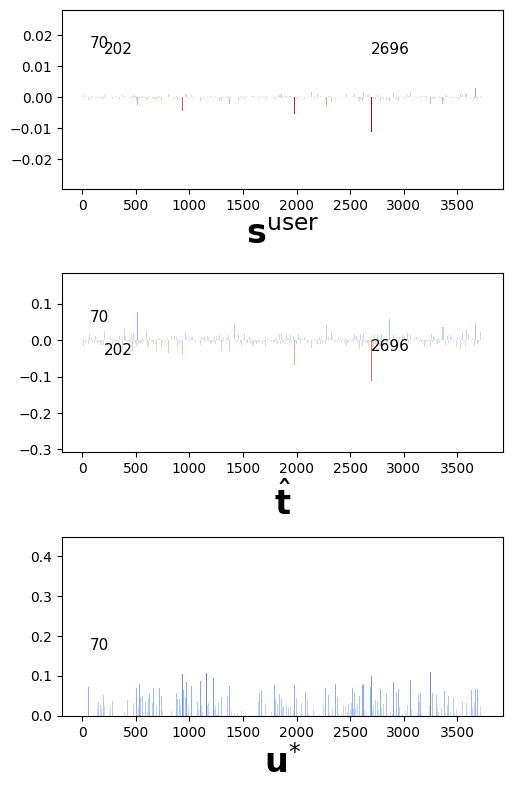

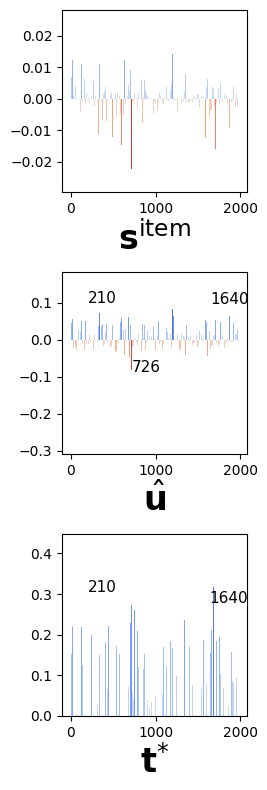

In [ ]:
# 重みの可視化
weight_visualization(u_sim_mtx=user_embeddings_flattened, u_proj=u_proj_flattened, i_sim_mtx=item_embeddings_flattened, i_proj=i_proj_flattened, annotate_top_k=3)

In [ ]:
print(user_embeddings.shape)
print(u_proj.shape)
print(item_embeddings.shape)
print(i_proj.shape)

(68, 55)
(36, 55)
(36, 55)
(68, 55)


ちょっと使ってたやつ

In [ ]:
def weight_visualization(u_sim_mtx: np.ndarray, u_proj: np.ndarray, i_sim_mtx: np.ndarray, i_proj: np.ndarray,
                         annotate_top_k: int = 3):
    """
    Creates weight visualization plots which is used to explain the recommendation of ProtoMF
    :param u_sim_mtx,...,i_proj: vectors that are obtained by the UI-PROTOMF model given the user and item pair.
    :param annotate_top_k: how many of the highest logits need to be annotated
    """

    rescale = lambda y: 1 - ((y + np.max(y)) / (np.max(y) * 2))

    def compute_ylims(array):
        y_lim_max = np.max(array) * (1 + 1 / 9)
        y_lim_min = np.min(array) * (1 + 1 / 9)
        return y_lim_min, y_lim_max

    # Computing the logits

    u_prods = u_sim_mtx * i_proj
    print(u_prods.shape)
    i_prods = i_sim_mtx * u_proj
    print(i_prods.shape)

    u_dot = u_prods.sum()
    i_dot = i_prods.sum()

    i_n_prototypes = i_sim_mtx.shape[-1]
    u_n_prototypes = u_sim_mtx.shape[-1]

    # Rescale the plots according to the number of prototypes
    i_vis_ratio = i_n_prototypes / (i_n_prototypes + u_n_prototypes)
    u_vis_ratio = 1 - i_vis_ratio

    # Compute max and mins of the visualization of the logits
    prods_lims = compute_ylims(np.concatenate([u_prods, i_prods]))
    proj_lims = compute_ylims(np.concatenate([u_proj, i_proj]))
    sim_mtx_lims = (0, compute_ylims(np.concatenate([u_sim_mtx, i_sim_mtx]))[1])

    # Plotting the users
    u_fig, u_axes = plt.subplots(3, 1, sharey='row', dpi=100, figsize=(8 * u_vis_ratio, 8))
    u_x = np.arange(u_n_prototypes)

    bars_u_prods = u_axes[0].bar(u_x, u_prods, color=plt.get_cmap('coolwarm')(rescale(u_prods)))
    bars_i_proj = u_axes[1].bar(u_x, i_proj, color=plt.get_cmap('coolwarm')(rescale(i_proj)))
    bars_u_sim_mtx = u_axes[2].bar(u_x, u_sim_mtx, color=plt.get_cmap('coolwarm')(rescale(u_sim_mtx)))

    u_axes[0].set_ylim(prods_lims)
    u_axes[1].set_ylim(proj_lims)
    u_axes[2].set_ylim(sim_mtx_lims)

    u_annotate_protos = np.argsort(-u_prods)[:annotate_top_k]
    for idx, bars in enumerate([bars_u_prods, bars_i_proj, bars_u_sim_mtx]):
        for u_annotate_idx in u_annotate_protos:
            bar = bars[u_annotate_idx]
            label_x = bar.get_x() - 0.8
            label_y = bar.get_height() + (2e-2 if idx == 2 else 1e-2)
            u_axes[idx].annotate(f'{u_annotate_idx}', (label_x, label_y), fontsize=11)

    u_axes[0].set_xlabel(r'$ {\mathbf{s}}^{\mathrm{user}}$', fontsize=24)
    u_axes[1].set_xlabel('$ \hat{\mathbf{t}} $', fontsize=24)
    u_axes[2].set_xlabel('$ \mathbf{u}^{*} $', fontsize=24)
    plt.tight_layout()
    plt.plot()

    # Plotting the items
    i_fig, i_axes = plt.subplots(3, 1, sharey='row', dpi=100, figsize=(i_vis_ratio * 8, 8))
    i_x = np.arange(i_n_prototypes)

    bars_i_prods = i_axes[0].bar(i_x, i_prods, color=plt.get_cmap('coolwarm')(rescale(i_prods)))
    bars_u_proj = i_axes[1].bar(i_x, u_proj, color=plt.get_cmap('coolwarm')(rescale(u_proj)))
    bars_i_sim_mtx = i_axes[2].bar(i_x, i_sim_mtx, color=plt.get_cmap('coolwarm')(rescale(i_sim_mtx)))

    i_axes[0].set_ylim(prods_lims)
    i_axes[1].set_ylim(proj_lims)
    i_axes[2].set_ylim(sim_mtx_lims)

    # Annotations
    i_annotate_protos = np.argsort(-i_prods)[:annotate_top_k]
    for idx, bars in enumerate([bars_i_prods, bars_u_proj, bars_i_sim_mtx]):
        for i_annotate_idx in i_annotate_protos:
            bar = bars[i_annotate_idx]
            label_x = bar.get_x() + (-0.8 if idx == 2 else +0)
            label_y = bar.get_height() + (2e-2 if idx == 2 else 1e-2)
            i_axes[idx].annotate(f'{i_annotate_idx}', (label_x, label_y), fontsize=11)

    i_axes[0].set_xlabel('$ \mathbf{s}^{\mathrm{item}} $', fontsize=24)
    i_axes[1].set_xlabel('$ \hat{\mathbf{u}} $', fontsize=24)
    i_axes[2].set_xlabel('$ \mathbf{t}^{*} $', fontsize=24)
    plt.tight_layout()
    plt.plot()

In [ ]:
import numpy as np
import torch

def adjust_sim_mtx_dims(u_sim_mtx, i_sim_mtx, nn_item_prototypes, n_user_prototypes):
    # 型を確認 (numpy.ndarray として受け取った場合は torch.Tensor に変換)
    if isinstance(u_sim_mtx, np.ndarray):
        u_sim_mtx = torch.tensor(u_sim_mtx)
    if isinstance(i_sim_mtx, np.ndarray):
        i_sim_mtx = torch.tensor(i_sim_mtx)


    if u_sim_mtx.size(0) != n_item_prototypes:
        # u_sim_mtx をプロトタイプ数に合わせて調整
        repeat_factor = (n_item_prototypes + u_sim_mtx.size(1) - 1) // u_sim_mtx.size(1)
        u_sim_mtx = u_sim_mtx.repeat(1, repeat_factor)[:, :n_item_prototypes]


    if i_sim_mtx.size(0) != n_user_prototypes:
        # i_sim_mtx をプロトタイプ数に合わせて調整
        repeat_factor = (n_user_prototypes + i_sim_mtx.size(1) - 1) // i_sim_mtx.size(1)
        i_sim_mtx = i_sim_mtx.repeat(1, repeat_factor)[:, :n_user_prototypes]

    return u_sim_mtx, i_sim_mtx

(68,)
(36,)


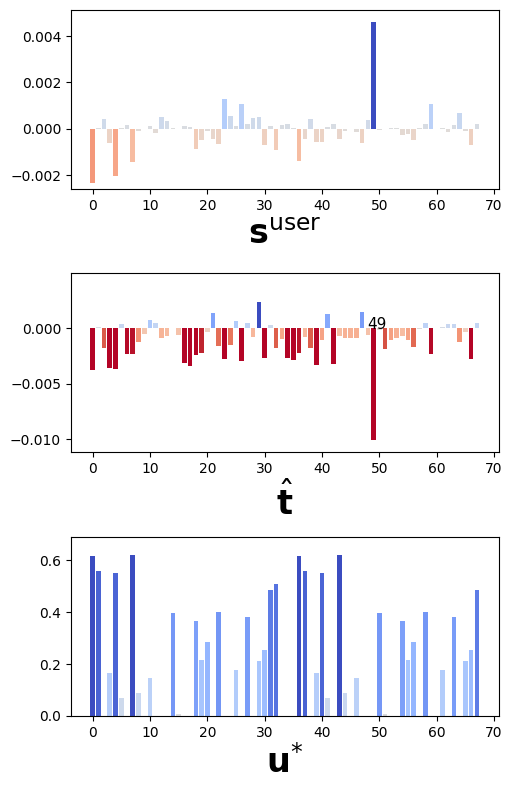

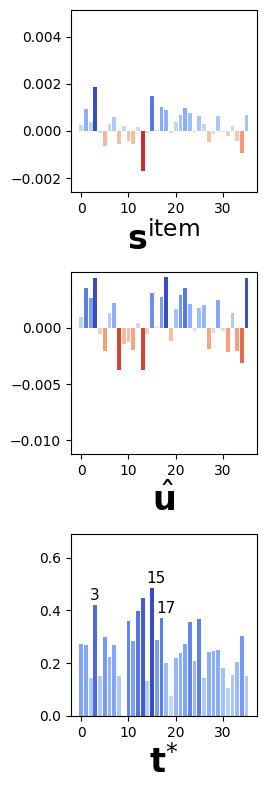

In [ ]:
weight_visualization(u_sim_mtx=u_sim_mtx, u_proj=u_proj, i_sim_mtx=i_sim_mtx, i_proj=i_proj, annotate_top_k=3)

In [ ]:
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%cd /content/drive/MyDrive/Master/research/model/user_item_proto_ml-1m_34_38210573_3dcadb68/

# モデルのロード
model_path = "best_model.pth"
state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)

# プロトタイプと埋め込みの取得
u_proj = state_dict['user_feature_extractor.model_1.prototypes'].cpu().detach().numpy()
i_proj = state_dict['item_feature_extractor.model_1.prototypes'].cpu().detach().numpy()
print("u_proj shape:",u_proj.shape)
print("i_proj shape:",i_proj.shape)


user_embeddings = state_dict['user_feature_extractor.model_2.linear_layer.weight'].cpu().detach().numpy()
item_embeddings = state_dict['item_feature_extractor.model_2.linear_layer.weight'].cpu().detach().numpy()
print("user_embeddings shape:",user_embeddings.shape)
print("item_embeddings shape:",item_embeddings.shape)

# i_sim_mtxとu_sim_mtxの準備
i_sim_mtx = cosine_similarity(item_embeddings, i_proj)  # (n_items, n_prototypes)
u_sim_mtx = cosine_similarity(user_embeddings, u_proj)  # (n_items, n_prototypes)

n_user_prototypes = u_sim_mtx.shape[0]  # u_sim_mtx のプロトタイプ数
n_item_prototypes = i_sim_mtx.shape[0]

# 次元調整
u_sim_mtx, i_sim_mtx = adjust_sim_mtx_dims(u_sim_mtx, i_sim_mtx, n_item_prototypes, n_user_prototypes)
u_sim_mtx=u_sim_mtx.numpy()
i_sim_mtx=i_sim_mtx.numpy()
print("u_sim_mtx shape:",u_sim_mtx.shape)
print("i_sim_mtx shape:",i_sim_mtx.shape)

u_sim_mtx_avg = u_sim_mtx.mean(axis=1)
print("u_sim_mtx_avg shape:",u_sim_mtx_avg.shape)
i_sim_mtx_avg = i_sim_mtx.mean(axis=1)
print("i_sim_mtx_avg shape:",i_sim_mtx_avg.shape)

u_proj_avg = u_proj.mean(axis=1)
print("u_proj_avg shape:", u_proj_avg.shape)
i_proj_avg = i_proj.mean(axis=1)
print("i_proj_avg shape:", i_proj_avg.shape)

# user_embeddings_flattened = user_embeddings.flatten()
# item_embeddings_flattened = item_embeddings.flatten()
# print("user_embeddings_flattened shape:",user_embeddings_flattened.shape)
# print("item_embeddings_flattened shape:",item_embeddings_flattened.shape)

# u_proj_flattened = u_proj.flatten()
# i_proj_flattened = i_proj.flatten()
# print("u_proj_flattened shape:",u_proj_flattened.shape)
# print("i_proj_flattened shape:",i_proj_flattened.shape)

/content/drive/MyDrive/Master/research/model/user_item_proto_ml-1m_34_38210573_3dcadb68
u_proj shape: (36, 55)
i_proj shape: (68, 55)
user_embeddings shape: (68, 55)
item_embeddings shape: (36, 55)
u_sim_mtx shape: (68, 36)
i_sim_mtx shape: (36, 68)
u_sim_mtx_avg shape: (68,)
i_sim_mtx_avg shape: (36,)
u_proj_avg shape: (36,)
i_proj_avg shape: (68,)


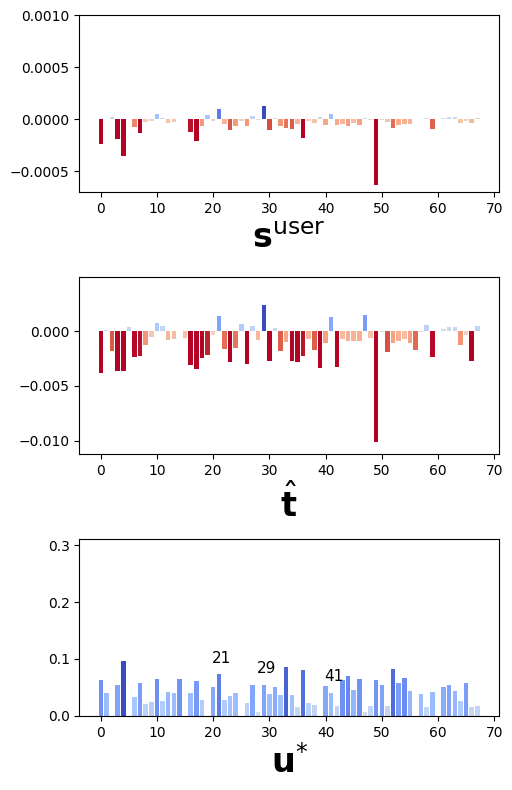

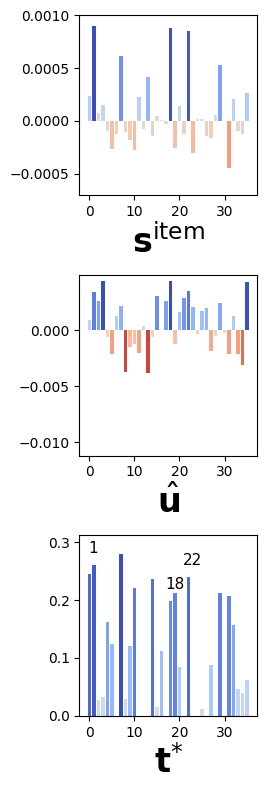

In [ ]:
weight_visualization(u_sim_mtx=u_sim_mtx_avg, u_proj=u_proj_avg, i_sim_mtx=i_sim_mtx_avg, i_proj=i_proj_avg, annotate_top_k=3)

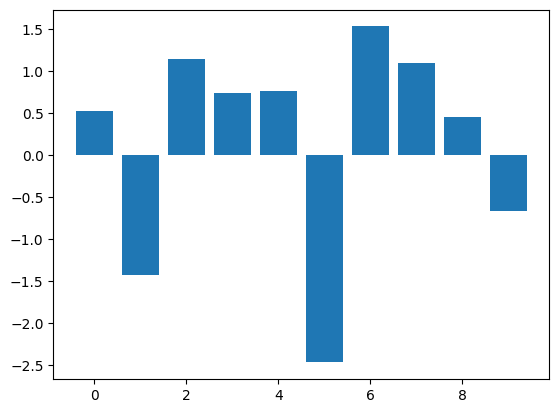

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# シンプルなデータを用意
data = np.random.randn(10)

# プロット
plt.bar(range(len(data)), data)
plt.show()


In [ ]:
# 例: item_weightsの準備
item_weights = cosine_similarity(item_embeddings, item_prototypes)  # (n_items, n_prototypes)

i_proto_idxs=i_top_indices
print(i_proto_idxs)

# 各プロトタイプインデックスに対して、トップKアイテムを取得
top_k_results = []
top_k = 5  # 取得するアイテム数

for proto_idx in i_proto_idxs:
    top_k_items = get_top_k_items(item_weights=item_weights, items_info=items_info, proto_idx=proto_idx, top_k=top_k, invert=False)
    top_k_items['prototype_index'] = proto_idx  # プロトタイプインデックスを追加
    top_k_results.append(top_k_items)

# 結果を表示
# リストをDataFrameに変換
top_k_df = pd.concat(top_k_results)

# プロトタイプごとの列を作成（optional）
top_k_df = top_k_df.reset_index()

# アイテム情報の取得
user_info = users_info.iloc[user_id]  # user_idに該当するアイテム情報

# 表を表示
print(f"User {user_id} に対する情報:")
print(user_info)

# 表を表示
import IPython.display as display
display.display(top_k_df)

[48 78 39]
User 0 に対する情報:
user_id           1
gender            F
age               1
occupation       10
zip_code      48067
Name: 0, dtype: object


,index,item_id,title,genres,item weight,prototype_index
0,5,6,Heat (1995),Action|Crime|Thriller,0.867155,48
1,13,14,Nixon (1995),Drama,0.866363,48
2,10,11,"American President, The (1995)",Comedy|Drama|Romance,0.866083,48
3,8,9,Sudden Death (1995),Action,0.862871,48
4,6,7,Sabrina (1995),Comedy|Romance,0.861052,48
5,3,4,Waiting to Exhale (1995),Comedy|Drama,0.600784,78
6,9,10,GoldenEye (1995),Action|Adventure|Thriller,0.600352,78
7,16,17,Sense and Sensibility (1995),Drama|Romance,0.600133,78
8,1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.600071,78
9,2,3,Grumpier Old Men (1995),Comedy|Romance,0.599807,78
